<a href="https://colab.research.google.com/github/KeerthikaDuddupudi/Loan-Repayment/blob/main/classfication_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing packages
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/Loan_Repayment_Behavior.csv')
df.head()

,Loan_ID,Borrower_Age,Loan_Amount,Annual_Income,Employment_Status,Repayment_Term,Credit_Score,Monthly_Repayment,Default_History,Risk_Category
0,9b8cbc32-a438-462c-b2e8-aca939e78fb4,31,40908.0,42249.0,Self-Employed,60,410,1015.028726,0,Low
1,31d2c554-9c88-4b3f-88ec-13391c12f7de,39,31293.0,121105.0,Unemployed,60,404,1904.801993,1,Low
2,0de9ee07-0e37-4921-9c15-3235a61d0ce8,37,4700.0,137226.0,Employed,36,448,1547.572447,1,Medium
3,6c962411-01e7-4c04-8875-bbb9f88b7aaf,52,10052.0,87311.0,Employed,36,509,1124.598281,0,High
4,3b513a70-b56d-4f5a-bfdc-192971ab7d02,34,22492.0,147984.0,Employed,60,699,661.383738,0,Medium


In [5]:
# See the no. of rows and columns
df.shape

(550, 10)

In [6]:
#printing all columns
data_cols = df.columns.tolist()
print(data_cols)

['Loan_ID', 'Borrower_Age', 'Loan_Amount', 'Annual_Income', 'Employment_Status', 'Repayment_Term', 'Credit_Score', 'Monthly_Repayment', 'Default_History', 'Risk_Category']


In [7]:
# Display data type of each feature
df.dtypes

,0
Loan_ID,object
Borrower_Age,int64
Loan_Amount,float64
Annual_Income,float64
Employment_Status,object
Repayment_Term,int64
Credit_Score,int64
Monthly_Repayment,float64
Default_History,int64
Risk_Category,object


In [8]:
df.describe()

,Borrower_Age,Loan_Amount,Annual_Income,Repayment_Term,Credit_Score,Monthly_Repayment,Default_History
count,550.000000,535.000000,522.000000,550.000000,550.000000,522.000000,550.000000
mean,41.149091,25344.923364,86459.325670,35.410909,583.656364,1063.710466,0.507273
std,13.703587,14673.194486,35193.995742,16.734568,161.115465,554.075218,0.500402
min,18.000000,1019.000000,25887.000000,12.000000,300.000000,102.042635,0.000000
25%,30.000000,12109.000000,54829.250000,24.000000,444.250000,573.588926,0.000000
50%,41.000000,25618.000000,84533.000000,36.000000,583.000000,1100.066727,1.000000
75%,53.000000,37996.500000,116992.250000,48.000000,725.250000,1544.151053,1.000000
max,64.000000,49826.000000,149975.000000,60.000000,849.000000,1998.811763,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            550 non-null    object 
 1   Borrower_Age       550 non-null    int64  
 2   Loan_Amount        535 non-null    float64
 3   Annual_Income      522 non-null    float64
 4   Employment_Status  550 non-null    object 
 5   Repayment_Term     550 non-null    int64  
 6   Credit_Score       550 non-null    int64  
 7   Monthly_Repayment  522 non-null    float64
 8   Default_History    550 non-null    int64  
 9   Risk_Category      550 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 43.1+ KB


In [10]:
# find the null values
df.isnull().sum()

,0
Loan_ID,0
Borrower_Age,0
Loan_Amount,15
Annual_Income,28
Employment_Status,0
Repayment_Term,0
Credit_Score,0
Monthly_Repayment,28
Default_History,0
Risk_Category,0


In [11]:
# Remove unwanted columns
df.drop(columns=['Loan_ID'], inplace=True)  # specify the columns to remove

In [12]:
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns
num_columns
cat_columns

Index(['Employment_Status', 'Risk_Category'], dtype='object')

In [13]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
# fill the missing values for numerical terms - mean
#df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
# fill the missing values for categorical terms - mode
#df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])

In [14]:
# find the null values
df.isnull().sum()

,0
Borrower_Age,0
Loan_Amount,0
Annual_Income,0
Employment_Status,0
Repayment_Term,0
Credit_Score,0
Monthly_Repayment,0
Default_History,0
Risk_Category,0


In [15]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,Borrower_Age,Loan_Amount,Annual_Income,Employment_Status,Repayment_Term,Credit_Score,Monthly_Repayment,Default_History,Risk_Category
0,31,40908.0,42249.0,2,60,410,1015.028726,0,1
1,39,31293.0,121105.0,3,60,404,1904.801993,1,1
2,37,4700.0,137226.0,0,36,448,1547.572447,1,2
3,52,10052.0,87311.0,0,36,509,1124.598281,0,0
4,34,22492.0,147984.0,0,60,699,661.383738,0,2


In [16]:
# Scale numerical features with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [17]:
df.head()

,Borrower_Age,Loan_Amount,Annual_Income,Employment_Status,Repayment_Term,Credit_Score,Monthly_Repayment,Default_History,Risk_Category
0,0.282609,0.817280,0.131858,2,1.0,0.200364,0.481337,0.0,1
1,0.456522,0.620280,0.767343,3,1.0,0.189435,0.950437,1.0,1
2,0.413043,0.075420,0.897258,0,0.5,0.269581,0.762101,1.0,2
3,0.739130,0.185076,0.495004,0,0.5,0.380692,0.539104,0.0,0
4,0.347826,0.439957,0.983955,0,1.0,0.726776,0.294892,0.0,2


In [18]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Risk_Category', axis=1)  # -- independent variable
y = df['Risk_Category'] # -- dependent variable

In [19]:
X
y


,Risk_Category
0,1
1,1
2,2
3,0
4,2
...,...
545,2
546,1
547,2
548,2


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
# Evaluate Logistic Regression model
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [23]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.39090909090909093
Logistic Regression Confusion Matrix:
 [[17  2 11]
 [16 14  9]
 [16 13 12]]


In [24]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

In [26]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.37272727272727274
Random Forest Confusion Matrix:
 [[15 11  4]
 [12 13 14]
 [10 18 13]]


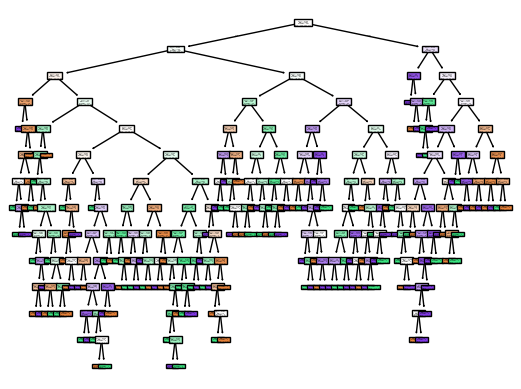

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [27]:
# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [28]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
